### A quick exploration of the example dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the source data from Kaggle
url="https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv"
df=pd.read_csv(url)
df.shape

(891, 12)

In [3]:
# Keep only a few columns, and drop missing values
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.dropna(how='any', inplace=True);
df.shape

(712, 6)

In [4]:
# Let's spell out the port of embarcation
df.loc[(df['Embarked']=='C') , 'Embarked']='Cherbourg'
df.loc[(df['Embarked']=='Q') , 'Embarked']='Queenstown'
df.loc[(df['Embarked']=='S') , 'Embarked']='Southampton'
df['Embarked'].value_counts()

Southampton    554
Cherbourg      130
Queenstown      28
Name: Embarked, dtype: int64

In [5]:
# Convert Pclass to a numeric format, and sort it
df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce').fillna(0).astype(np.int64);
print(df['Pclass'].dtype)
df['Pclass'].value_counts().sort_index()

int64


1    184
2    173
3    355
Name: Pclass, dtype: int64

## Basic value counts

In [6]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [7]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [8]:
df['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [9]:
df['Sex'].value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [10]:
df['Pclass'].value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

In [11]:
df['Age'].mean()

29.64209269662921

In [12]:
df['Embarked'].value_counts()
# (C = Cherbourg; Q = Queenstown; S = Southampton)

Southampton    554
Cherbourg      130
Queenstown      28
Name: Embarked, dtype: int64

## Visualizations

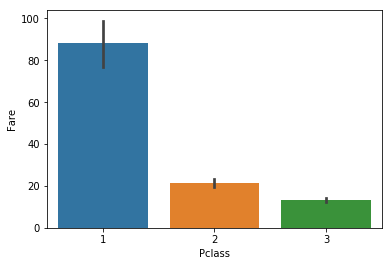

In [14]:
sns.barplot(x='Pclass', y='Fare', data=df);

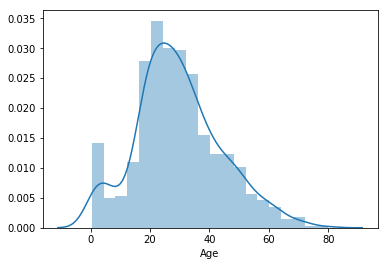

In [15]:
# histogram
sns.distplot(df['Age']);

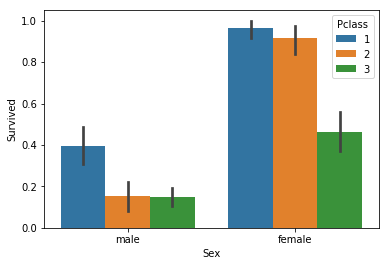

In [16]:
# Comparison barchart
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df);

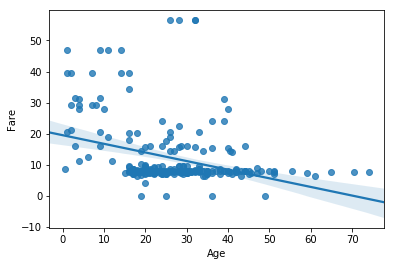

In [17]:
# scatter 
sns.regplot(x='Age', y='Fare', data=df.loc[(df['Pclass']==3) & 
                                           (df['Sex']=='male')], fit_reg=True)

In [18]:
sex_survive=df.groupby('Sex').Survived.mean()
sex_survive

Sex
female    0.752896
male      0.205298
Name: Survived, dtype: float64

In [19]:
# Convert to csv
df.to_csv('titanic.csv')